,Time,Engine Coolant Temperature [°C],Intake Manifold Absolute Pressure [kPa],Engine RPM [RPM],Vehicle Speed Sensor [km/h],Intake Air Temperature [°C],Air Flow Rate from Mass Flow Sensor [g/s],Absolute Throttle Position [%],Ambient Air Temperature [°C],Accelerator Pedal Position D [%],Accelerator Pedal Position E [%]
0,06:58:41.245,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,06:58:41.335,17,96.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,06:58:41.396,17,96.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,06:58:41.485,17,96.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,06:58:41.547,17,96.0,0.0,0.0,11.0,NaN,NaN,NaN,NaN,NaN
5,06:58:41.635,17,96.0,0.0,0.0,11.0,0.88,NaN,NaN,NaN,NaN
6,06:58:41.697,17,96.0,0.0,0.0,11.0,0.88,89.0,NaN,NaN,NaN
7,06:58:41.787,17,96.0,0.0,0.0,11.0,0.88,89.0,16.0,NaN,NaN
8,06:58:41.846,17,96.0,0.0,0.0,11.0,0.88,89.0,16.0,14.1,NaN
9,06:58:41.935,17,96.0,0.0,0.0,11.0,0.88,89.0,16.0,14.1,14.5



DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76463 entries, 0 to 76462
Data columns (total 11 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Time                                       76463 non-null  object 
 1   Engine Coolant Temperature [°C]            76463 non-null  int64  
 2   Intake Manifold Absolute Pressure [kPa]    76462 non-null  float64
 3   Engine RPM [RPM]                           76461 non-null  float64
 4   Vehicle Speed Sensor [km/h]                76460 non-null  float64
 5   Intake Air Temperature [°C]                76459 non-null  float64
 6   Air Flow Rate from Mass Flow Sensor [g/s]  76458 non-null  float64
 7   Absolute Throttle Position [%]             76457 non-null  float64
 8   Ambient Air Temperature [°C]               76456 non-null  float64
 9   Accelerator Pedal Position D [%]           76455 non-null  float64
 10  Accel

,Engine RPM [RPM],Vehicle Speed Sensor [km/h],Air Flow Rate from Mass Flow Sensor [g/s]
count,76461.000000,76460.000000,76458.000000
mean,1428.770053,57.176824,20.950773
std,595.391579,49.175417,17.033579
min,0.000000,0.000000,0.000000
25%,919.000000,9.000000,8.630000
50%,1463.000000,46.000000,16.130000
75%,1914.000000,106.000000,27.660000
max,3255.000000,193.000000,114.610000



Subset preview (after trimming):


,Time,RPM,Speed_kmh,MAF_gps
0,06:58:41.396,0.0,NaN,NaN
1,06:58:41.485,0.0,0.0,NaN
2,06:58:41.547,0.0,0.0,NaN
3,06:58:41.635,0.0,0.0,0.88
4,06:58:41.697,0.0,0.0,0.88
5,06:58:41.787,0.0,0.0,0.88
6,06:58:41.846,0.0,0.0,0.88
7,06:58:41.935,0.0,0.0,0.88
8,06:58:42.026,0.0,0.0,0.88
9,06:58:42.087,0.0,0.0,0.88


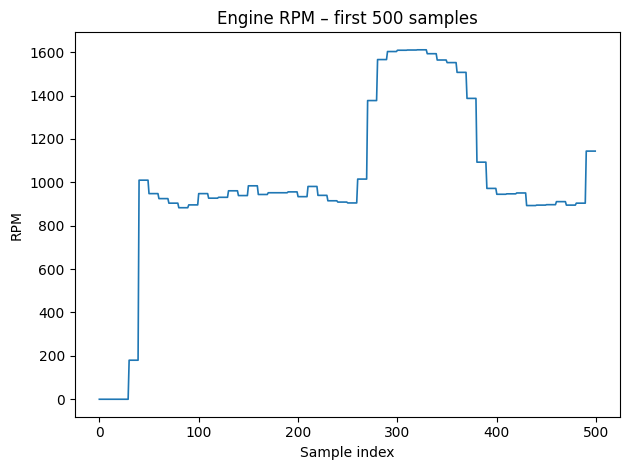

In [ ]:
# 01_data_exploration.ipynb — KIT OBD-II (simple Week 1)

import pandas as pd
import matplotlib.pyplot as plt

# Load
file_path = "../data/ODB-II-Dataset/2018-04-23_Seat_Leon_RT_KA_Normal.csv"
df = pd.read_csv(file_path)

# Quick peek (renders even if prints follow)
display(df.head(10))

# Inspect
print("\nDataFrame info:")
df.info()

key_cols = [
    "Engine RPM [RPM]",
    "Vehicle Speed Sensor [km/h]",
    "Air Flow Rate from Mass Flow Sensor [g/s]"
]
available = [c for c in key_cols if c in df.columns]

print("\nSummary stats (key signals):")
display(df[available].describe())

# Rename for convenience
rename_map = {
    "Engine RPM [RPM]": "RPM",
    "Vehicle Speed Sensor [km/h]": "Speed_kmh",
    "Air Flow Rate from Mass Flow Sensor [g/s]": "MAF_gps",
}
df = df.rename(columns={k: v for k, v in rename_map.items() if k in df.columns})

#trim initial all-NaN block for key signals (prevents fill-from-nothing later)
present = [c for c in ["RPM", "Speed_kmh", "MAF_gps"] if c in df.columns]
if present:
    first_valid_idx = df[present].dropna(how="all").index.min()
    if pd.notna(first_valid_idx):
        df = df.loc[first_valid_idx:].reset_index(drop=True)

# Subset preview
subset = [c for c in ["Time", "RPM", "Speed_kmh", "MAF_gps"] if c in df.columns]
if subset:
    print("\nSubset preview (after trimming):")
    display(df[subset].head(10))

#Visual check
if "RPM" in df.columns:
    ax = df["RPM"].iloc[:500].plot(title="Engine RPM – first 500 samples", lw=1.2)
    ax.set_xlabel("Sample index"); ax.set_ylabel("RPM")
    plt.tight_layout(); plt.show()
